In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

### Data Preprocessing:

In [3]:
df=pd.read_csv(r"C:\Users\anura\Desktop\d\EastWestAirlines.csv")
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
#missing the values
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
df["Award?"].value_counts()

Award?
0    2518
1    1481
Name: count, dtype: int64

In [7]:
df.shape

(3999, 12)

In [8]:
numerical_cols =df.select_dtypes(include =["number"]).columns
numerical_cols

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [9]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


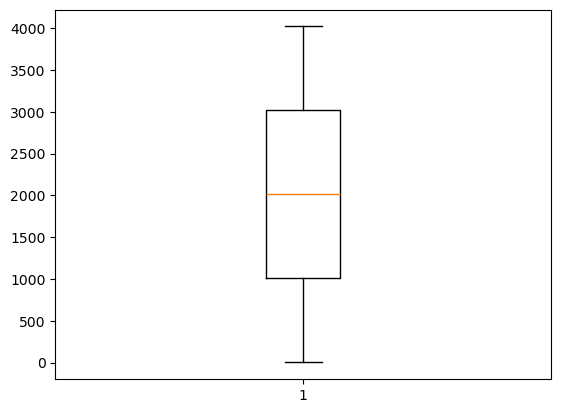

Outliers in Volume Column:
 Empty DataFrame
Columns: [ID#, Balance, Qual_miles, cc1_miles, cc2_miles, cc3_miles, Bonus_miles, Bonus_trans, Flight_miles_12mo, Flight_trans_12, Days_since_enroll, Award?]
Index: []
Number of outliers: 0


In [10]:
# box plot for ID#
plt.boxplot(df["ID#"])
plt.show()
Q1 = df["ID#"].quantile(0.25)
Q3 = df["ID#"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["ID#"] < lower_bound) | (df["ID#"] > upper_bound)]
print("Outliers in Volume Column:\n", outliers)
print(f"Number of outliers: {len(outliers)}")

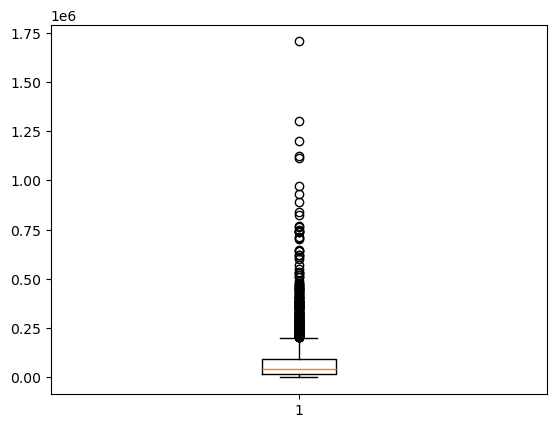

Outliers in Volume Column:
        ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
8        9   443003           0          3          2          1         1753   
24      25   205651         500          1          1          1         4025   
32      33   276571           0          4          1          1        42044   
43      44   619393           0          3          1          1        15008   
45      46   288865         967          1          1          1        23600   
...    ...      ...         ...        ...        ...        ...          ...   
3754  3777   221543           0          1          1          1        10300   
3756  3779   203353           0          1          1          1        14000   
3772  3795   822321           0          5          1          1       138334   
3788  3811   374613           0          1          2          1        23592   
3839  3862   204693           0          1          1          1         5159   


In [11]:
# box plot for Balance
plt.boxplot(df["Balance"])
plt.show()
Q1 = df["Balance"].quantile(0.25)
Q3 = df["Balance"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Balance"] < lower_bound) | (df["Balance"] > upper_bound)]
print("Outliers in Volume Column:\n", outliers)
print(f"Number of outliers: {len(outliers)}")

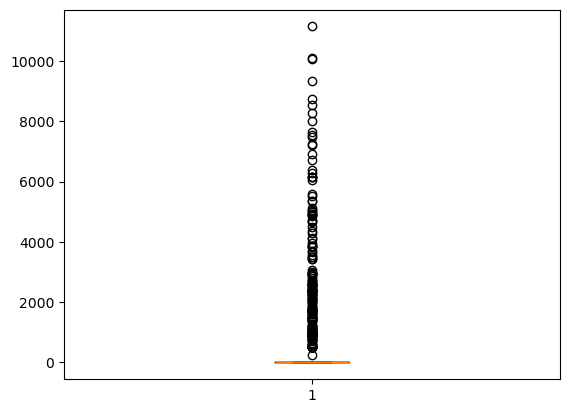

Outliers in Volume Column:
        ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
21      22   185681        2024          1          1          1        13300   
24      25   205651         500          1          1          1         4025   
45      46   288865         967          1          1          1        23600   
70      72    84409        5031          2          1          1        15436   
100    103    25076        1182          5          1          1        57203   
...    ...      ...         ...        ...        ...        ...          ...   
3902  3925    13004        1000          1          1          1        13890   
3911  3934    55922        2273          1          1          1         8104   
3953  3976    59927         739          1          1          1         3100   
3956  3979    47301        1005          1          1          1         4561   
3961  3984   131125         862          1          1          1         4993   


In [12]:
# box plot for Qual_miles
plt.boxplot(df["Qual_miles"])
plt.show()
Q1 = df["Qual_miles"].quantile(0.25)
Q3 = df["Qual_miles"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Qual_miles"] < lower_bound) | (df["Qual_miles"] > upper_bound)]
print("Outliers in Volume Column:\n", outliers)
print(f"Number of outliers: {len(outliers)}")

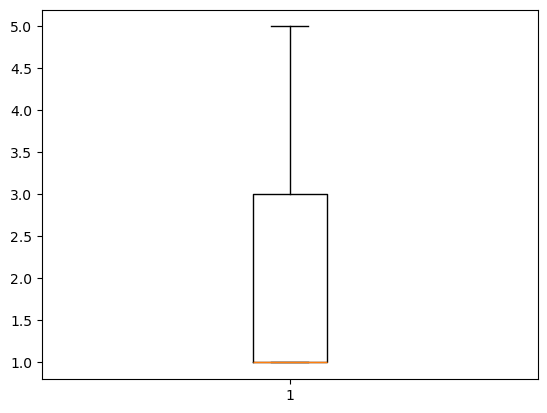

Outliers in Volume Column:
 Empty DataFrame
Columns: [ID#, Balance, Qual_miles, cc1_miles, cc2_miles, cc3_miles, Bonus_miles, Bonus_trans, Flight_miles_12mo, Flight_trans_12, Days_since_enroll, Award?]
Index: []
Number of outliers: 0


In [13]:
# box plot for cc1_miles
plt.boxplot(df["cc1_miles"])
plt.show()
Q1 = df["cc1_miles"].quantile(0.25)
Q3 = df["cc1_miles"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["cc1_miles"] < lower_bound) | (df["cc1_miles"] > upper_bound)]
print("Outliers in Volume Column:\n", outliers)
print(f"Number of outliers: {len(outliers)}")

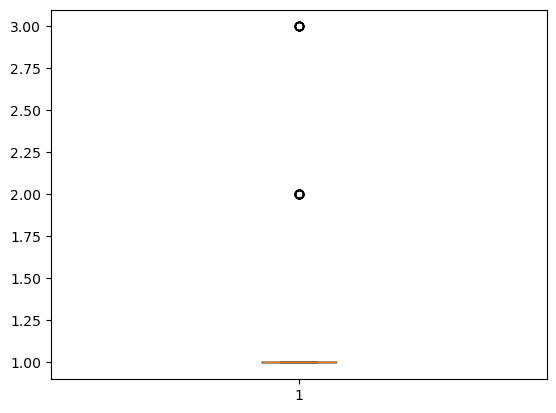

Outliers in Volume Column:
        ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
8        9   443003           0          3          2          1         1753   
198    202     8669           0          1          3          1        11397   
226    230   117329           0          1          2          1         6448   
381    386   167670           0          1          3          1        15907   
392    398    11189           0          1          2          1         9044   
561    568   380930           0          2          2          1        22485   
794    804    55610           0          1          2          1         5095   
940    951    44824           0          1          3          1        21107   
1149  1161    84856           0          1          2          1         6894   
1270  1283    16103           0          1          3          1        10819   
1383  1397    18154           0          1          2          1         7748   


In [14]:
# box plot for cc2_miles
plt.boxplot(df["cc2_miles"])
plt.show()
Q1 = df["cc2_miles"].quantile(0.25)
Q3 = df["cc2_miles"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["cc2_miles"] < lower_bound) | (df["cc2_miles"] > upper_bound)]
print("Outliers in Volume Column:\n", outliers)
print(f"Number of outliers: {len(outliers)}")

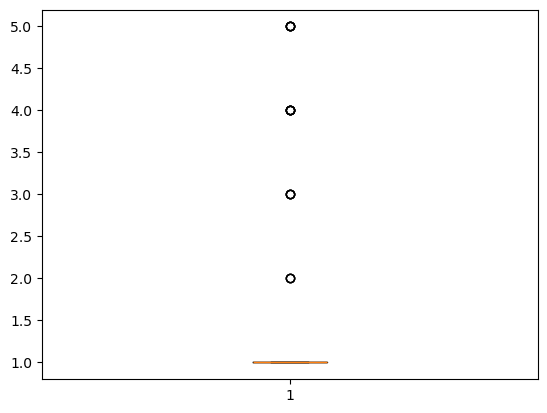

Outliers in Volume Column:
        ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
106    109    96627        1182          1          1          3        49059   
343    348   112501           0          1          1          2        19140   
384    389    28193           0          5          1          4       103456   
850    861    25629           0          4          1          5       107308   
904    915    15835           0          2          1          5       112171   
1036  1047   154664           0          4          1          3        73881   
1244  1257   166465           0          4          1          4        98717   
1300  1313   737514           0          3          1          4        43993   
1878  1895   128302           0          5          1          4       132263   
1917  1934    82981           0          5          1          3       105325   
1946  1963   126873           0          4          1          5        95598   


In [15]:
# box plot for cc3_miles
plt.boxplot(df["cc3_miles"])
plt.show()
Q1 = df["cc3_miles"].quantile(0.25)
Q3 = df["cc3_miles"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["cc3_miles"] < lower_bound) | (df["cc3_miles"] > upper_bound)]
print("Outliers in Volume Column:\n", outliers)
print(f"Number of outliers: {len(outliers)}")

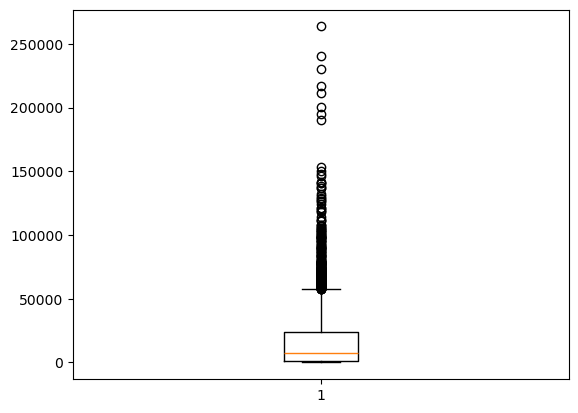

Outliers in Volume Column:
        ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
11      12    96522           0          5          1          1        61105   
20      21   120576           0          5          1          1        58831   
79      82    38896           0          5          1          1        76988   
85      88    35418           0          5          1          1        58557   
94      97   185549           0          5          1          1       110859   
...    ...      ...         ...        ...        ...        ...          ...   
3822  3845   166638           0          5          1          1        64572   
3846  3869    97510        1678          5          1          1        71609   
3855  3878   190730           0          5          1          1        78916   
3883  3906   126167           0          5          1          1       190160   
3917  3940   130748           0          4          1          1        65510   


In [16]:
# box plot for Bonus_miles
plt.boxplot(df["Bonus_miles"])
plt.show()
Q1 = df["Bonus_miles"].quantile(0.25)
Q3 = df["Bonus_miles"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Bonus_miles"] < lower_bound) | (df["Bonus_miles"] > upper_bound)]
print("Outliers in Volume Column:\n", outliers)
print(f"Number of outliers: {len(outliers)}")

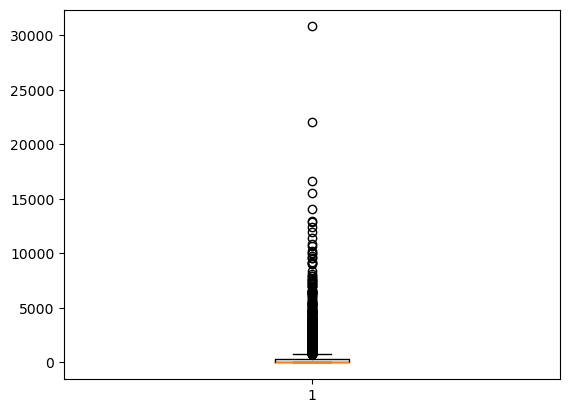

Outliers in Volume Column:
        ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
4        5    97752           0          4          1          1        43300   
8        9   443003           0          3          2          1         1753   
9       10   104860           0          3          1          1        28426   
21      22   185681        2024          1          1          1        13300   
22      23    20584           0          1          1          1         3450   
...    ...      ...         ...        ...        ...        ...          ...   
3934  3957    76595           0          1          1          1        10577   
3946  3969   139032           0          3          1          1        19565   
3950  3973    59650           0          1          1          1         5050   
3967  3990    26504           0          2          1          1        10599   
3979  4002    57793           0          3          1          1        20959   


In [17]:
# box plot for Flight_miles_12mo
plt.boxplot(df["Flight_miles_12mo"])
plt.show()
Q1 = df["Flight_miles_12mo"].quantile(0.25)
Q3 = df["Flight_miles_12mo"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Flight_miles_12mo"] < lower_bound) | (df["Flight_miles_12mo"] > upper_bound)]
print("Outliers in Volume Column:\n", outliers)
print(f"Number of outliers: {len(outliers)}")

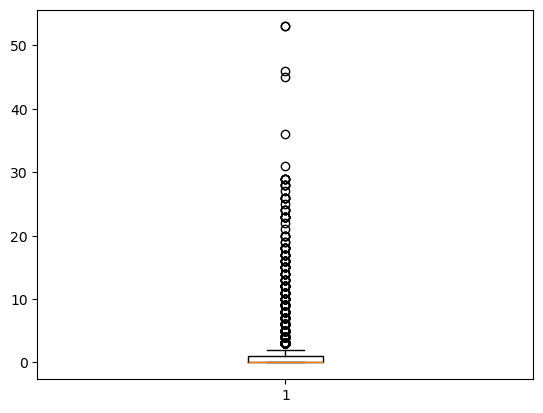

Outliers in Volume Column:
        ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
4        5    97752           0          4          1          1        43300   
8        9   443003           0          3          2          1         1753   
9       10   104860           0          3          1          1        28426   
21      22   185681        2024          1          1          1        13300   
22      23    20584           0          1          1          1         3450   
...    ...      ...         ...        ...        ...        ...          ...   
3930  3953    40424           0          4          1          1        44110   
3946  3969   139032           0          3          1          1        19565   
3950  3973    59650           0          1          1          1         5050   
3967  3990    26504           0          2          1          1        10599   
3979  4002    57793           0          3          1          1        20959   


In [18]:
# box plot for Flight_trans_12
plt.boxplot(df["Flight_trans_12"])
plt.show()
Q1 = df["Flight_trans_12"].quantile(0.25)
Q3 = df["Flight_trans_12"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Flight_trans_12"] < lower_bound) | (df["Flight_trans_12"] > upper_bound)]
print("Outliers in Volume Column:\n", outliers)
print(f"Number of outliers: {len(outliers)}")

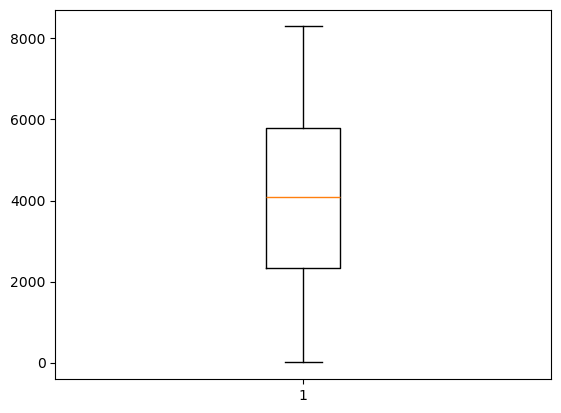

Outliers in Volume Column:
 Empty DataFrame
Columns: [ID#, Balance, Qual_miles, cc1_miles, cc2_miles, cc3_miles, Bonus_miles, Bonus_trans, Flight_miles_12mo, Flight_trans_12, Days_since_enroll, Award?]
Index: []
Number of outliers: 0


In [19]:
# box plot for Days_since_enroll
plt.boxplot(df["Days_since_enroll"])
plt.show()
Q1 = df["Days_since_enroll"].quantile(0.25)
Q3 = df["Days_since_enroll"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Days_since_enroll"] < lower_bound) | (df["Days_since_enroll"] > upper_bound)]
print("Outliers in Volume Column:\n", outliers)
print(f"Number of outliers: {len(outliers)}")

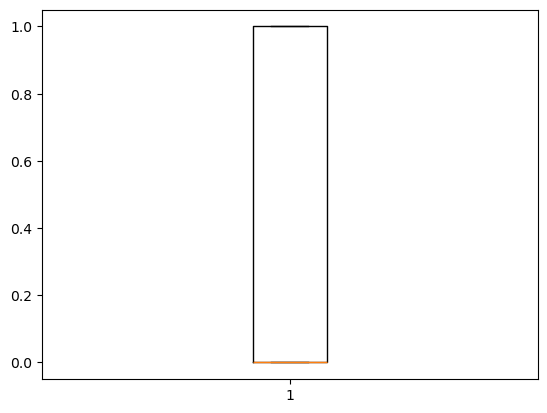

Outliers in Volume Column:
 Empty DataFrame
Columns: [ID#, Balance, Qual_miles, cc1_miles, cc2_miles, cc3_miles, Bonus_miles, Bonus_trans, Flight_miles_12mo, Flight_trans_12, Days_since_enroll, Award?]
Index: []
Number of outliers: 0


In [20]:
# box plot for Award?
plt.boxplot(df["Award?"])
plt.show()
Q1 = df["Award?"].quantile(0.25)
Q3 = df["Award?"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Award?"] < lower_bound) | (df["Award?"] > upper_bound)]
print("Outliers in Volume Column:\n", outliers)
print(f"Number of outliers: {len(outliers)}")

In [21]:
print(" The columns with outliers are," "Flight_miles_12mo," "Flight_trans_12,""Balance,""Qual_miles,""cc2_miles,""cc3_miles,""Bonus_miles,""Bonus_trans")

 The columns with outliers are,Flight_miles_12mo,Flight_trans_12,Balance,Qual_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans


In [51]:
def remove_outliers_iqr(df, Flight_miles_12mo):
    Q1 = df[Flight_miles_12mo].quantile(0.25)
    Q3 = df[Flight_miles_12mo].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[Flight_miles_12mo] >= lower_bound) & (df[Flight_miles_12mo] <= upper_bound)]

# Remove outliers from 'Flight_miles_12mo' column
df_cleaned = remove_outliers_iqr(df, 'Flight_miles_12mo')
print("Before:", df.shape)
print("After :", df_cleaned.shape)

def remove_outliers_iqr(df, Flight_trans_12):
    Q1 = df[Flight_trans_12].quantile(0.25)
    Q3 = df[Flight_trans_12].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[Flight_trans_12] >= lower_bound) & (df[Flight_trans_12] <= upper_bound)]

# Remove outliers from 'Flight_trans_12' column
df_cleaned = remove_outliers_iqr(df, 'Flight_trans_12')
print("Before:", df.shape)
print("After :", df_cleaned.shape)


def remove_outliers_iqr(df, Balance):
    Q1 = df[Balance].quantile(0.25)
    Q3 = df[Balance].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[Balance] >= lower_bound) & (df[Balance] <= upper_bound)]

# Remove outliers from 'Balance' column
df_cleaned = remove_outliers_iqr(df, 'Balance')
print("Before:", df.shape)
print("After :", df_cleaned.shape)

def remove_outliers_iqr(df, cc2_miles):
    Q1 = df[cc2_miles].quantile(0.25)
    Q3 = df[cc2_miles].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[cc2_miles] >= lower_bound) & (df[cc2_miles] <= upper_bound)]

# Remove outliers from 'cc2_miles' column
df_cleaned = remove_outliers_iqr(df, 'cc2_miles')
print("Before:", df.shape)
print("After :", df_cleaned.shape)

def remove_outliers_iqr(df, cc3_miles):
    Q1 = df[cc3_miles].quantile(0.25)
    Q3 = df[cc3_miles].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[cc3_miles] >= lower_bound) & (df[cc3_miles] <= upper_bound)]

# Remove outliers from 'cc3_miles' column
df_cleaned = remove_outliers_iqr(df, 'cc3_miles')
print("Before:", df.shape)
print("After :", df_cleaned.shape)


def remove_outliers_iqr(df, Bonus_miles):
    Q1 = df[Bonus_miles].quantile(0.25)
    Q3 = df[Bonus_miles].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[Bonus_miles] >= lower_bound) & (df[Bonus_miles] <= upper_bound)]

# Remove outliers from 'Bonus_miles' column
df_cleaned = remove_outliers_iqr(df, 'Bonus_miles')
print("Before:", df.shape)
print("After :", df_cleaned.shape)



def remove_outliers_iqr(df, Bonus_trans):
    Q1 = df[Bonus_trans].quantile(0.25)
    Q3 = df[Bonus_trans].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[Bonus_trans] >= lower_bound) & (df[Bonus_trans] <= upper_bound)]

# Remove outliers from 'Bonus_trans' column
df_cleaned = remove_outliers_iqr(df, 'Bonus_trans')
print("Before:", df.shape)
print("After :", df_cleaned.shape)
print("WE removed the outliers")

Before: (3999, 13)
After : (3430, 13)
Before: (3999, 13)
After : (3434, 13)
Before: (3999, 13)
After : (3733, 13)
Before: (3999, 13)
After : (3956, 13)
Before: (3999, 13)
After : (3981, 13)
Before: (3999, 13)
After : (3719, 13)
Before: (3999, 13)
After : (3936, 13)
WE removed the outliers


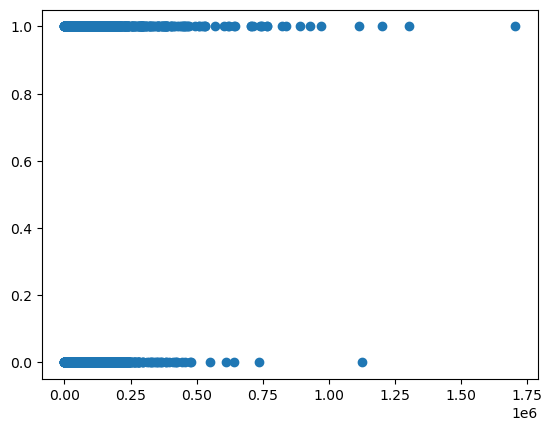

In [44]:
#EDA
import matplotlib.pyplot as plt 
plt.scatter(x =df["Balance"], y =df["Award?"])
plt.show()

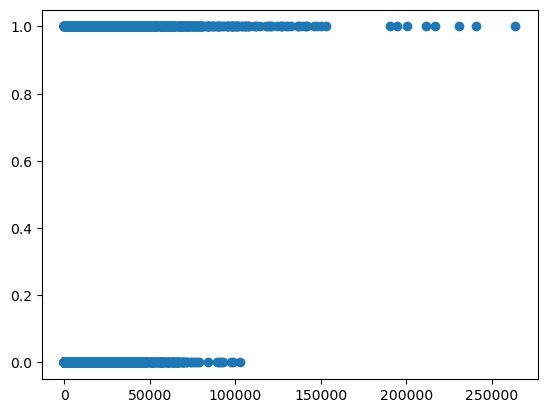

In [45]:
#EDA
import matplotlib.pyplot as plt 
plt.scatter(x =df["Bonus_miles"], y =df["Award?"])
plt.show()

In [46]:
# Drop the ID column as it's not useful for EDA
df_cleaned = df.drop(columns=["ID#"])


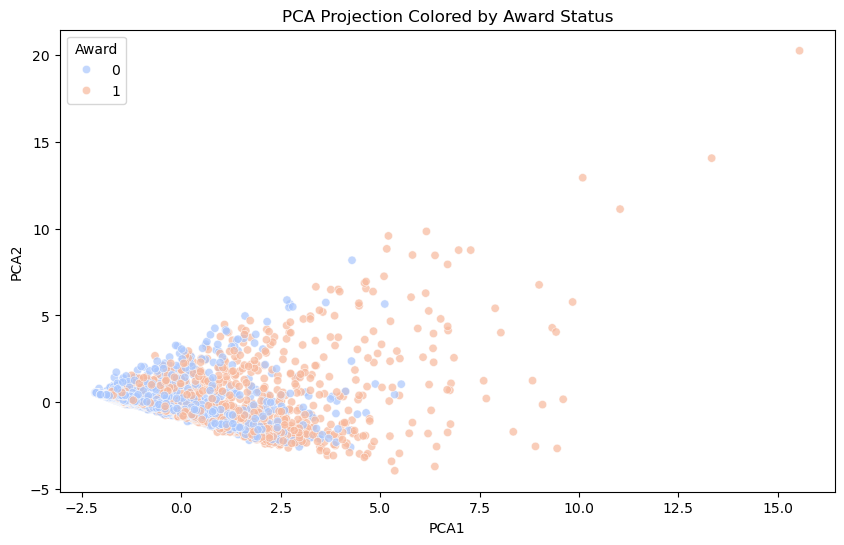

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

# Drop low-variance columns (cc2_miles, cc3_miles)
df_filtered = df_cleaned.drop(columns=["cc2_miles", "cc3_miles"])

# Scale the data for PCA and clustering visualization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_filtered.drop(columns=["Award?"]))

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

# Add PCA results to DataFrame
pca_df = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])
pca_df['Award'] = df_filtered['Award?'].values

# Plot the PCA components colored by Award status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Award', palette='coolwarm', alpha=0.7)
plt.title('PCA Projection Colored by Award Status')
plt.show()


### Implementing Clustering Algorithms:

### K - Means Cluster {OR} Non Hierarchal clustering (K-Means clustering)

In [48]:
X =df.iloc[:,1:]

In [49]:
from sklearn.cluster import KMeans
cluster =KMeans(n_clusters =5)
df["Kmeans"]  =cluster.fit_predict(X)
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kmeans
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


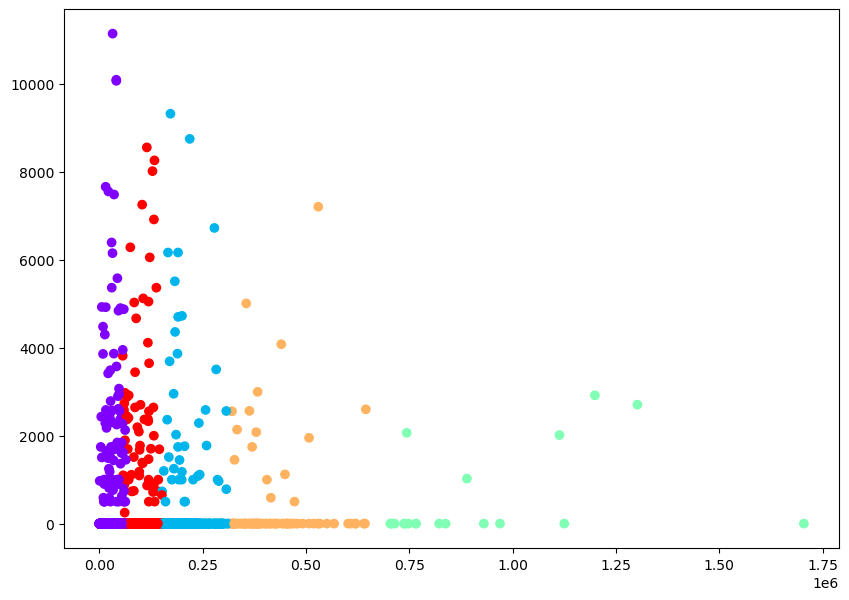

In [50]:
plt.figure(figsize =(10, 7))
plt.scatter(X.iloc[:,0],X.iloc[:,1], c =cluster.labels_, cmap ='rainbow')

In [52]:
from sklearn.metrics import silhouette_score
score =silhouette_score(X, df["Kmeans"])
print("score:", np.round(score, 2))

score: 0.54


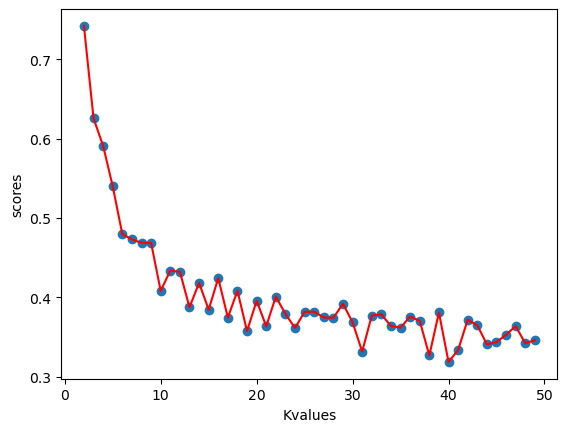

In [53]:
scores =[]

for i in range(2, 50):
    from sklearn.cluster import KMeans
    cluster =KMeans(n_clusters =i)
    df["Kmeans"] =cluster.fit_predict(X)
    scores.append(silhouette_score(X, df["Kmeans"]))

scores 

plt.scatter(x =range(2, 50), y =scores)
plt.plot(range(2, 50), scores, color ="red")
plt.xlabel("Kvalues")
plt.ylabel("scores")
plt.show()


###  Hierarchal clustering (Agglomerative clustering)

### Single linkage method

In [54]:
from sklearn.cluster import AgglomerativeClustering
cluster      =AgglomerativeClustering(n_clusters =5, linkage ='single')
df["single"] =cluster.fit_predict(X)
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kmeans,single
0,1,28143,0,1,1,1,174,1,0,0,7000,0,7,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,27,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,48,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,27,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,27,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,10,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,43,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,10,0


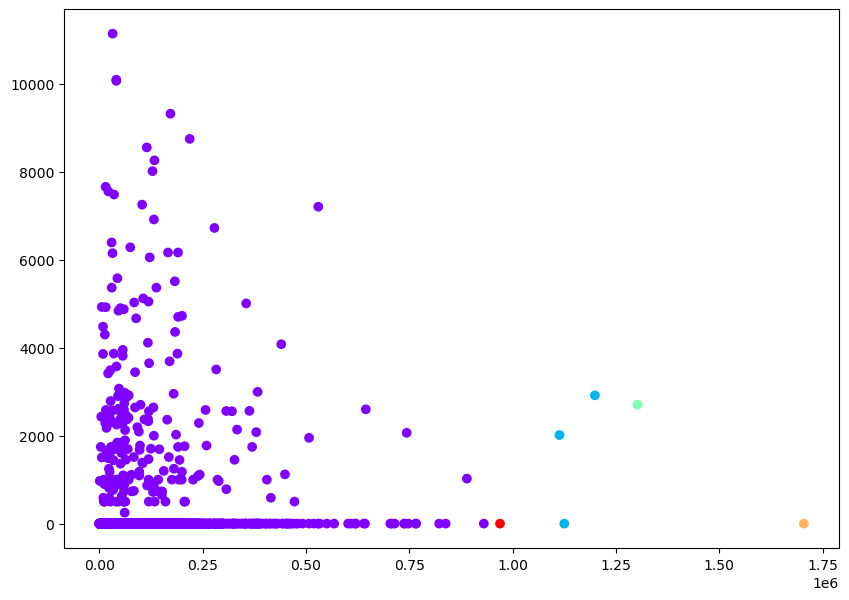

In [55]:
plt.figure(figsize =(10, 7))
plt.scatter(X.iloc[:,0], X.iloc[:, 1], c=cluster.labels_, cmap ='rainbow')

In [56]:
from sklearn.metrics import silhouette_score 
score =silhouette_score(X, df["single"])
print("score:", np.round(score, 2))

score: 0.89


### Complete linkage method

In [57]:
from sklearn.cluster import AgglomerativeClustering 
cluster         =AgglomerativeClustering(n_clusters =5, linkage ='complete')
df["complete"]  =cluster.fit_predict(X)
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kmeans,single,complete
0,1,28143,0,1,1,1,174,1,0,0,7000,0,7,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,27,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,48,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,27,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,29,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,27,0,4
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,10,0,4
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,43,0,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,10,0,4


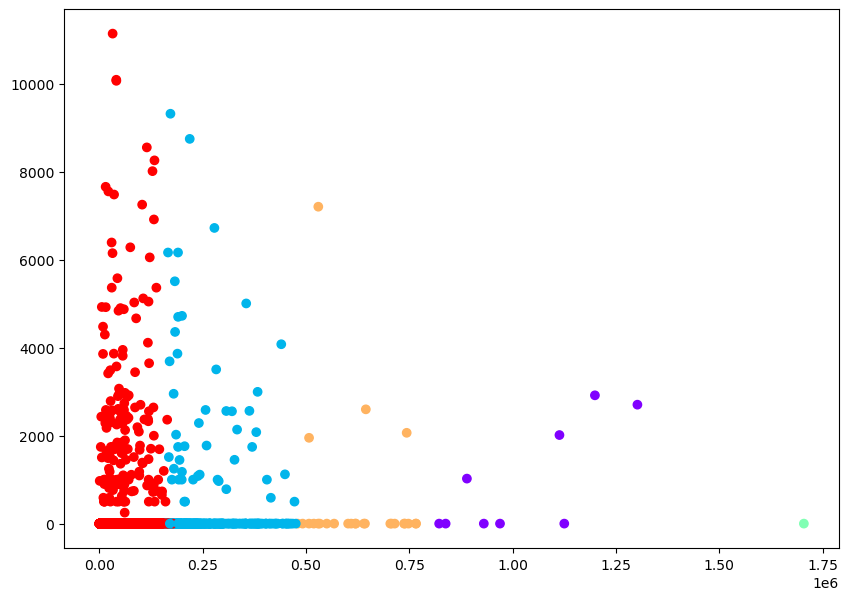

In [58]:
plt.figure(figsize =(10, 7))
plt.scatter(X.iloc[:,0], X.iloc[:, 1], c =cluster.labels_, cmap ='rainbow')

In [59]:
from sklearn.metrics import silhouette_score
score  =silhouette_score(X, df["complete"])
print("score:", np.round(score, 2))

score: 0.69


### Average linkage method

In [60]:
from sklearn.cluster import AgglomerativeClustering 
cluster        =AgglomerativeClustering(n_clusters =5, linkage ="average")
df["average"]  =cluster.fit_predict(X)
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kmeans,single,complete,average
0,1,28143,0,1,1,1,174,1,0,0,7000,0,7,0,4,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,27,0,4,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,48,0,4,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,27,0,4,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,29,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,27,0,4,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,10,0,4,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,43,0,4,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,10,0,4,0


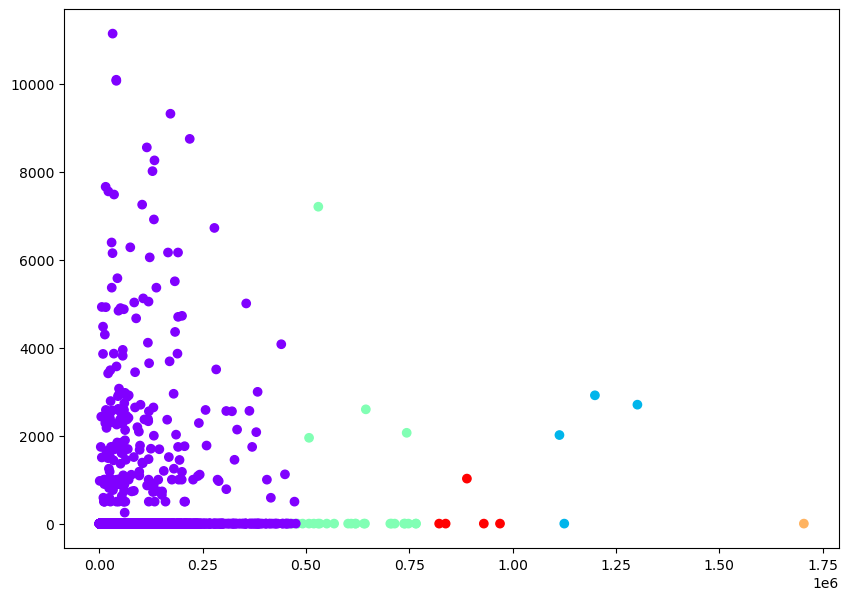

In [61]:
plt.figure(figsize =(10, 7))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster.labels_, cmap ="rainbow")

In [62]:
from sklearn.metrics import silhouette_score 
score  =silhouette_score(X, df["average"])
print("score:", np.round(score, 2))

score: 0.84


### Ward linkage method

In [63]:
from sklearn.cluster import AgglomerativeClustering
cluster    =AgglomerativeClustering(n_clusters =5, linkage ="ward")
df["ward"] =cluster.fit_predict(X)
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kmeans,single,complete,average,ward
0,1,28143,0,1,1,1,174,1,0,0,7000,0,7,0,4,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,27,0,4,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,48,0,4,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,27,0,4,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,29,0,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,27,0,4,0,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,10,0,4,0,4
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,43,0,4,0,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,10,0,4,0,4


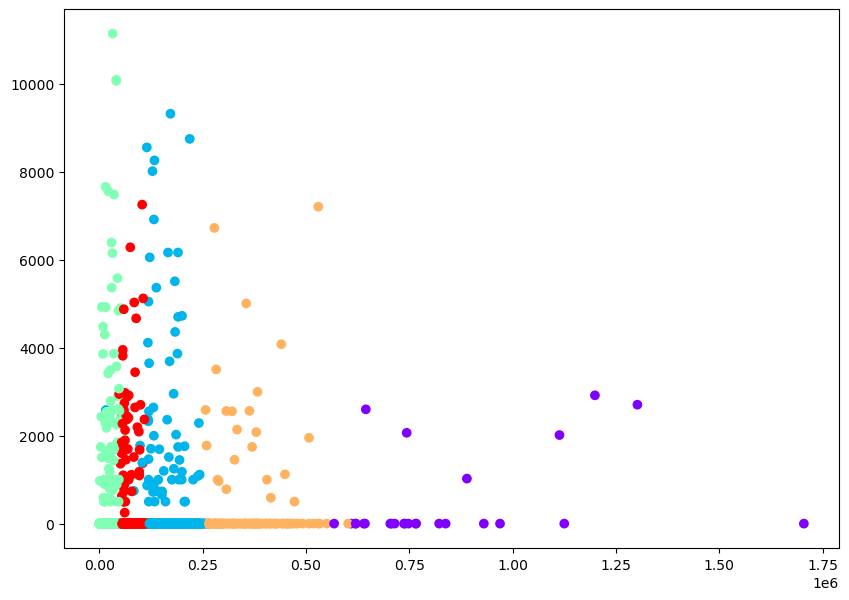

In [64]:
plt.figure(figsize =(10, 7))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c =cluster.labels_, cmap ="rainbow")

In [65]:
from sklearn.metrics import silhouette_score 
score  =silhouette_score(X, df["ward"])
print("score:", np.round(score, 2))

score: 0.49


In [66]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kmeans,single,complete,average,ward
0,1,28143,0,1,1,1,174,1,0,0,7000,0,7,0,4,0,2
1,2,19244,0,1,1,1,215,2,0,0,6968,0,27,0,4,0,2
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,48,0,4,0,2
3,4,14776,0,1,1,1,500,1,0,0,6952,0,27,0,4,0,2
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,29,0,4,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,27,0,4,0,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,10,0,4,0,4
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,43,0,4,0,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,10,0,4,0,4


### DBSCAN

In [68]:
from sklearn.preprocessing import StandardScaler
SS =StandardScaler()
SS
SS_X =SS.fit_transform(X)

In [69]:
from sklearn.cluster import DBSCAN 
DBSCAN() 
dbscan =DBSCAN(eps =0.5, min_samples =3)
dbscan.fit(SS_X)
dbscan.labels_

array([ 0,  0,  0, ..., 60,  0,  0], dtype=int64)

In [70]:
df["dbscan"]  =dbscan.labels_
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kmeans,single,complete,average,ward,dbscan
0,1,28143,0,1,1,1,174,1,0,0,7000,0,7,0,4,0,2,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,27,0,4,0,2,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,48,0,4,0,2,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,27,0,4,0,2,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,29,0,4,0,4,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,27,0,4,0,2,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,10,0,4,0,4,42
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,43,0,4,0,4,60
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,10,0,4,0,4,0


In [71]:
df[df["dbscan"] ==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kmeans,single,complete,average,ward,dbscan
0,1,28143,0,1,1,1,174,1,0,0,7000,0,7,0,4,0,2,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,27,0,4,0,2,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,48,0,4,0,2,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,27,0,4,0,2,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,27,0,4,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,4013,11310,0,1,1,1,5021,2,0,0,1409,0,27,0,4,0,2,0
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,27,0,4,0,2,0
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,8,0,4,0,2,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,10,0,4,0,4,0


In [72]:
df[df["dbscan"] ==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kmeans,single,complete,average,ward,dbscan
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,7,0,4,0,2,1
17,18,13958,0,1,1,1,4291,5,0,0,6905,1,27,0,4,0,2,1
29,30,19221,0,1,1,1,4655,8,500,1,7896,1,27,0,4,0,2,1
36,37,23193,0,1,1,1,650,4,550,3,7861,1,7,0,4,0,2,1
39,40,2176,0,1,1,1,0,0,0,0,7847,1,8,0,4,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3941,3964,17613,0,1,1,1,5030,9,0,0,1495,1,27,0,4,0,2,1
3944,3967,2124,0,1,1,1,2324,2,0,0,1487,1,8,0,4,0,2,1
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,27,0,4,0,2,1
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,8,0,4,0,2,1


In [73]:
df[df["dbscan"]  ==-1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kmeans,single,complete,average,ward,dbscan
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,29,0,4,0,4,-1
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,43,0,4,0,4,-1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,17,0,1,0,3,-1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,2,0,4,0,4,-1
19,20,23354,0,3,1,1,10447,5,0,0,6896,1,7,0,4,0,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3967,3990,26504,0,2,1,1,10599,29,1000,7,1445,0,7,0,4,0,2,-1
3974,3997,58387,0,3,1,1,14581,39,0,0,1435,0,10,0,4,0,4,-1
3978,4001,10071,0,2,1,1,27701,16,0,0,1421,1,0,0,4,0,2,-1
3979,4002,57793,0,3,1,1,20959,15,1198,3,1424,1,23,0,4,0,4,-1


In [74]:
df.shape

(3999, 18)

In [75]:
df_new  =df[df["dbscan"] != -1]
df_new

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kmeans,single,complete,average,ward,dbscan
0,1,28143,0,1,1,1,174,1,0,0,7000,0,7,0,4,0,2,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,27,0,4,0,2,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,48,0,4,0,2,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,27,0,4,0,2,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,27,0,4,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,27,0,4,0,2,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,10,0,4,0,4,42
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,43,0,4,0,4,60
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,10,0,4,0,4,0


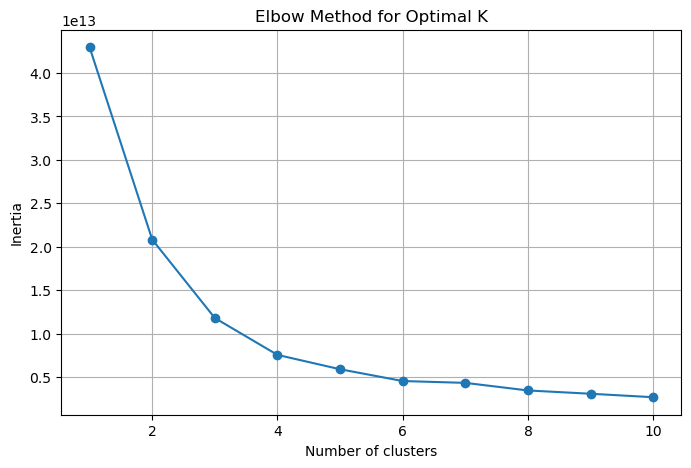

In [79]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [82]:
# Choose optimal K (adjust based on elbow plot)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(df)

# Add cluster labels to the scaled dataframe
df['Cluster'] = clusters
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Kmeans,single,complete,average,ward,dbscan,Cluster
0,1,28143,0,1,1,1,174,1,0,0,7000,0,7,0,4,0,2,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,27,0,4,0,2,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,48,0,4,0,2,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,27,0,4,0,2,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,29,0,4,0,4,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,27,0,4,0,2,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,10,0,4,0,4,42,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,43,0,4,0,4,60,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,10,0,4,0,4,0,1


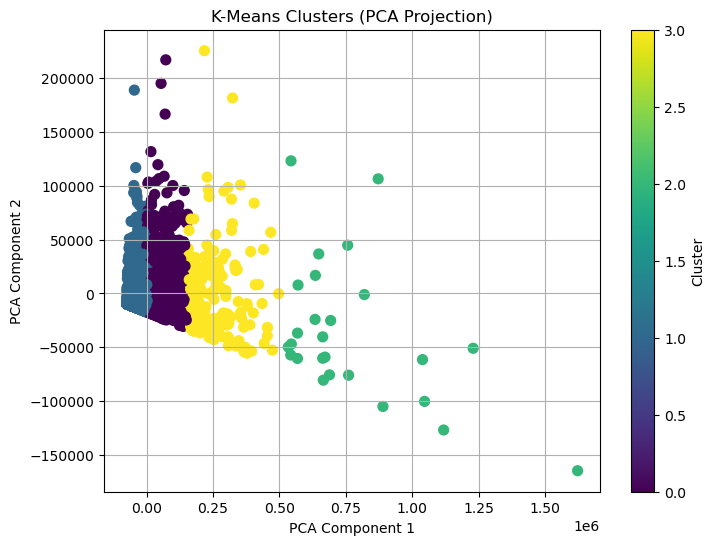

In [83]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_data = pca.fit_transform(df.drop(columns=['Cluster']))

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title('K-Means Clusters (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [85]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df.drop(columns=['Cluster']), df['Cluster'])
print(f"Silhouette Score for K={optimal_k}: {score:.4f}")


Silhouette Score for K=4: 0.5894


In [89]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Apply DBSCAN with trial parameters (can be tuned)
dbscan = DBSCAN(eps=1.5, min_samples=5)
db_labels = dbscan.fit_predict(df.drop(columns=['Cluster']))

# Add DBSCAN cluster labels
df['DBSCAN_Cluster'] = db_labels


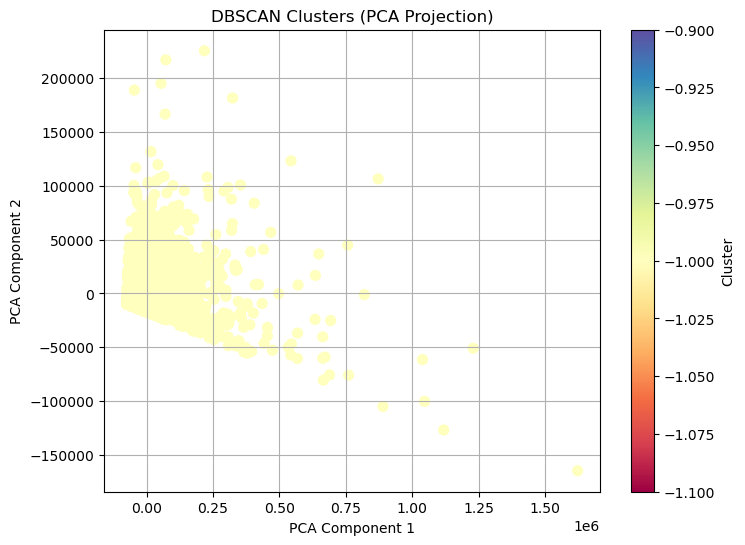

In [91]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['DBSCAN_Cluster'], cmap='Spectral', s=50)
plt.title('DBSCAN Clusters (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


In [92]:
# Silhouette score (only if more than 1 cluster)
if len(set(db_labels)) > 1 and -1 not in db_labels:
    dbscan_score = silhouette_score(df.drop(columns=['Cluster', 'DBSCAN_Cluster']), db_labels)
    print(f"Silhouette Score (DBSCAN): {dbscan_score:.4f}")
else:
    print("Silhouette Score not valid (only 1 cluster or many outliers).")


Silhouette Score not valid (only 1 cluster or many outliers).


In [1]:
#conclusion
print('''we have done eda and saw no null values. then we seen outliers which we removed. 
we Implemented the K-Means, hierarchical, and DBSCAN algorithms. we have seen the K-means cluster with k=4 gives us good Silhouette Score when comapred 
to other algorithms.
''')

we have done eda and saw no null values. then we seen outliers which we removed. 
we Implemented the K-Means, hierarchical, and DBSCAN algorithms. we have seen the K-means cluster with k=4 gives us good Silhouette Score when comapred 
to other algorithms.

